In [ ]:
# Step 1: Import libraries
import os, sys, numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

In [ ]:
# Step 2: Create data


In [ ]:
# N dimensional data
ndim = 3
mu = np.array([10] * ndim) # Mean
sigma = np.zeros([ndim, ndim]) - 1.8 # Covariance
np.fill_diagonal(sigma, 3.5)

# Mean, mu.
mu.shape

(3,)

In [ ]:
# Covariance matrix
sigma.shape

(3, 3)

In [ ]:
# Create 1000 samples using mean and sigma
org_data = rnd.multivariate_normal(mu, sigma, size=(1000))
org_data.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: covariance is not positive-semidefinite.
  


(1000, 3)

In [ ]:
# Step 3: Mean centering


In [ ]:
# Subtract mean from data
mean = np.mean(org_data, axis=0)
mean_data = org_data - mean
mean.shape

(3,)

In [ ]:
mean_data.shape # Data after subtracting mean  (1000, 3)


(1000, 3)

In [ ]:
# Step 4: Compute covariance matrix


In [ ]:
# Compute covariance matrix
cov = np.cov(mean_data.T)
cov = np.round(cov, 2)
cov.shape # Covariance matrix  (3, 3) 


array([[ 3.47, -1.67, -1.68],
       [-1.67,  3.55, -1.78],
       [-1.68, -1.78,  3.54]])

In [ ]:
# Step 5: Perform eigen decomposition of covariance matrix
eig_val, eig_vec = np.linalg.eig(cov)

In [ ]:
# print("Eigen vectors ", eig_vec.shape)
eig_vec.shape

array([[-0.01342363, -0.81800482],
       [-0.70170024,  0.41741813],
       [ 0.71234583,  0.39576536]])

In [ ]:
# print("Eigen values ", eig_val.shape)
eig_val.shape

array([5.32505729, 5.13499517, 0.09994754])

In [ ]:
# Step 6: Sort eigen vectors in descending order
  # Sort eigen values and corresponding eigen vectors in descending order
indices = np.arange(0,len(eig_val), 1)
indices = ([x for _,x in sorted(zip(eig_val, indices))])[::-1]
eig_val = eig_val[indices]
eig_vec = eig_vec[:,indices]

In [ ]:
# print("Sorted Eigen vectors ", eig_vec.shape)
eig_vec.shape

array([[-0.01342363, -0.81800482],
       [-0.70170024,  0.41741813],
       [ 0.71234583,  0.39576536]])

In [ ]:
# print("Sorted Eigen values ", eig_val.shape, "\n")
eig_val.shape

array([5.32505729, 5.13499517, 0.09994754])

In [ ]:
# Step 7: Compute explained variance and select N components
# Get explained variance
sum_eig_val = np.sum(eig_val)
explained_variance = eig_val/ sum_eig_val
cumulative_variance = np.cumsum(explained_variance)


In [ ]:
# print("Explained variance ", explained_variance)
explained_variance

array([0.50426679, 0.48626848, 0.00946473])

In [ ]:
# print("Cumulative variance ", cumulative_variance)
cumulative_variance

array([0.50426679, 0.99053527, 1.        ])

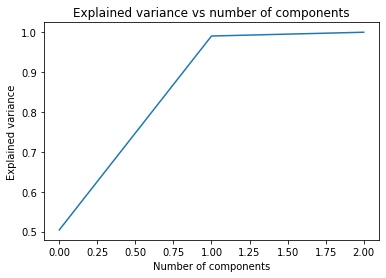

In [ ]:
# Plot explained variance
plt.plot(np.arange(0, len(explained_variance), 1), cumulative_variance)
plt.title("Explained variance vs number of components")
plt.xlabel("Number of components")
plt.ylabel("Explained variance")
plt.show()

In [ ]:
## We will have 2 components
n_comp = 2
eig_vec = eig_vec[:,:n_comp]
eig_vec.shape

(3, 2)

In [ ]:
# Step 8: Project data
pca_data = mean_data.dot(eig_vec)
pca_data.shape # Transformed data  (1000, 2)


array([[ 2.93785166,  2.40368787],
       [-3.74494961,  0.03983466],
       [-2.64318951, -0.34327665],
       ...,
       [-2.66433734,  1.60489231],
       [-1.94174992,  0.22749106],
       [ 1.93727046, -1.35690096]])

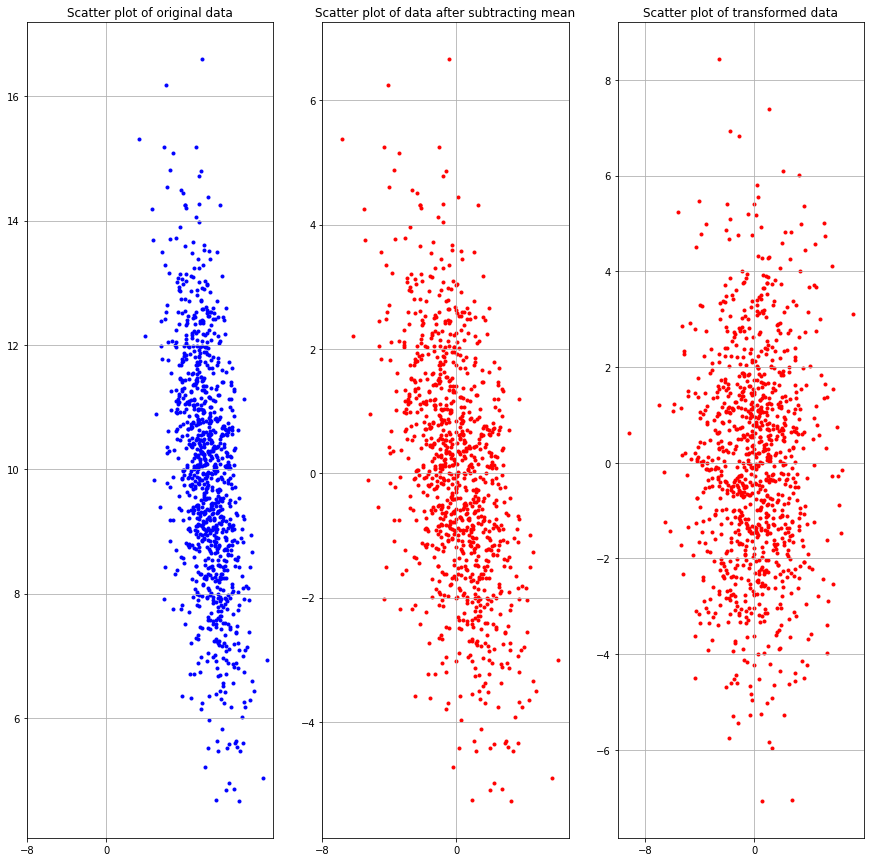

In [ ]:
 # Plot data
fig, ax = plt.subplots(1,3, figsize= (15,15))

# Plot original data
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')

# Plot data after subtracting mean from data
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')

# Plot data after subtracting mean from data
ax[2].scatter(pca_data[:,0], pca_data[:,1], color='red', marker='.')

# Set title
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after subtracting mean")
ax[2].set_title("Scatter plot of transformed data")

# Set x ticks
ax[0].set_xticks(np.arange(-8, 1, 8))
ax[1].set_xticks(np.arange(-8, 1, 8))
ax[2].set_xticks(np.arange(-8, 1, 8))

# Set grid to 'on'
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')

major_axis = eig_vec[:,0].flatten()
xmin = np.amin(pca_data[:,0])
xmax = np.amax(pca_data[:,0])
ymin = np.amin(pca_data[:,1])
ymax = np.amax(pca_data[:,1])

plt.show()
plt.close('all')

In [ ]:
# Step 9: Invert PCA and Reconstruct original data
# Reverse PCA transformation
recon_data = pca_data.dot(eig_vec.T) + mean
recon_data.shape

(1000, 3)

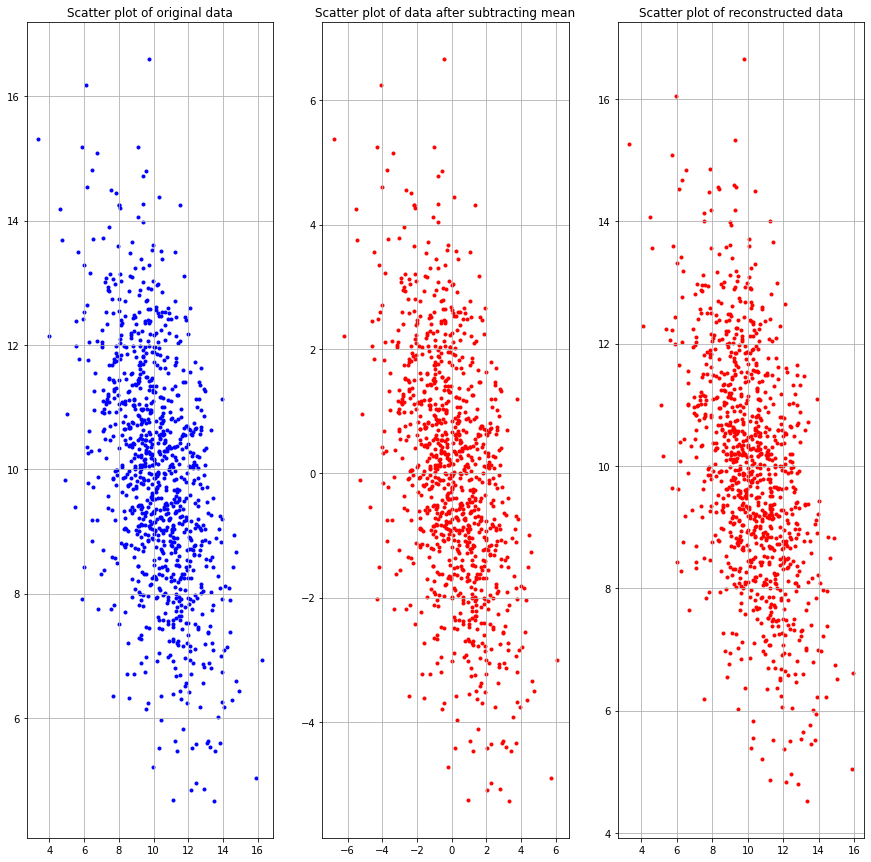

In [ ]:
# Plot reconstructed data

fig, ax = plt.subplots(1,3, figsize= (15, 15))
ax[0].scatter(org_data[:,0], org_data[:,1], color='blue', marker='.')
ax[1].scatter(mean_data[:,0], mean_data[:,1], color='red', marker='.')
ax[2].scatter(recon_data[:,0], recon_data[:,1], color='red', marker='.')
ax[0].set_title("Scatter plot of original data")
ax[1].set_title("Scatter plot of data after subtracting mean")
ax[2].set_title("Scatter plot of reconstructed data")
ax[0].grid('on')
ax[1].grid('on')
ax[2].grid('on')
plt.show()

In [ ]:
# Step 10: Reconstruction loss
# Compute reconstruction loss
loss = np.mean(np.square(recon_data - org_data))
print("Reconstruction loss ", loss)

Reconstruction loss  0.03399202507750147
